# Exploratoryy Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../dataset/bike_share.csv')

In [3]:
df.head()

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,2011-01-01 00:00:00,Spring,No,No,Clear,9.84,14.395,81,0.0,3,13,16
1,1,2011-01-01 01:00:00,Spring,No,No,Clear,9.02,13.635,80,0.0,8,32,40
2,2,2011-01-01 02:00:00,Spring,No,No,Clear,9.02,13.635,80,0.0,5,27,32
3,3,2011-01-01 03:00:00,Spring,No,No,Clear,9.84,14.395,75,0.0,3,10,13
4,4,2011-01-01 04:00:00,Spring,No,No,Clear,9.84,14.395,75,0.0,0,1,1


In [4]:
df.tail(10)

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10876,10876,2012-12-19 14:00:00,Winter,No,Yes,Clear,17.22,21.210,50,12.9980,33,185,218
10877,10877,2012-12-19 15:00:00,Winter,No,Yes,Clear,17.22,21.210,50,19.0012,28,209,237
10878,10878,2012-12-19 16:00:00,Winter,No,Yes,Clear,17.22,21.210,50,23.9994,37,297,334
10879,10879,2012-12-19 17:00:00,Winter,No,Yes,Clear,16.40,20.455,50,26.0027,26,536,562
10880,10880,2012-12-19 18:00:00,Winter,No,Yes,Clear,15.58,19.695,50,23.9994,23,546,569
10881,10881,2012-12-19 19:00:00,Winter,No,Yes,Clear,15.58,19.695,50,26.0027,7,329,336
10882,10882,2012-12-19 20:00:00,Winter,No,Yes,Clear,14.76,17.425,57,15.0013,10,231,241
10883,10883,2012-12-19 21:00:00,Winter,No,Yes,Clear,13.94,15.910,61,15.0013,4,164,168
10884,10884,2012-12-19 22:00:00,Winter,No,Yes,Clear,13.94,17.425,61,6.0032,12,117,129
10885,10885,2012-12-19 23:00:00,Winter,No,Yes,Clear,13.12,16.665,66,8.9981,4,84,88


In [5]:
df.sample(8)

,Unnamed: 0,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5792,5792,2012-01-16 12:00:00,Spring,Yes,No,Clear,8.20,9.090,55,22.0028,20,165,185
10080,10080,2012-11-05 09:00:00,Winter,No,Yes,Cloudy,12.30,14.395,52,19.0012,18,239,257
703,703,2011-02-12 15:00:00,Spring,No,No,Clear,13.94,15.150,29,27.9993,47,127,174
6317,6317,2012-02-19 11:00:00,Spring,No,No,Cloudy,10.66,11.365,56,22.0028,82,144,226
2853,2853,2011-07-07 19:00:00,Fall,No,Yes,Clear,33.62,38.635,52,19.0012,79,286,365
10242,10242,2012-11-12 04:00:00,Winter,Yes,No,Clear,16.40,20.455,76,6.0032,1,3,4
10628,10628,2012-12-09 06:00:00,Winter,No,No,Light rain/snow,16.40,20.455,94,7.0015,0,6,6
4688,4688,2011-11-08 10:00:00,Winter,No,Yes,Clear,17.22,21.210,71,6.0032,25,104,129


## Dropping Garbage Columns

In [6]:
df = df.drop(['Unnamed: 0'], axis=1)

In [7]:
df.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
4108,2011-10-03 05:00:00,Winter,No,Yes,Cloudy,14.76,18.180,76,7.0015,4,17,21
618,2011-02-08 22:00:00,Spring,No,Yes,Clear,4.92,5.305,33,23.9994,0,29,29
6731,2012-03-17 18:00:00,Spring,No,No,Clear,25.42,31.060,57,19.9995,221,339,560
567,2011-02-06 19:00:00,Spring,No,No,Clear,11.48,14.395,61,8.9981,1,20,21
10210,2012-11-10 20:00:00,Winter,No,No,Clear,18.04,21.970,54,0.0000,39,153,192


* Drop columns that are highly(positive or negative) correlated
* In case of high correlation, one feature can give information of another feature

In [8]:
df.corr(numeric_only=True)

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


In [9]:
to_drop = ['atemp', 'casual', 'registered']
# df = df.drop(to_drop, axis=1)
df.drop(to_drop, axis=1, inplace=True)

In [10]:
df.sample(5)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count
9309,2012-09-11 06:00:00,Fall,No,Yes,Clear,18.86,77,7.0015,211
5166,2011-12-09 08:00:00,Winter,No,Yes,Clear,9.84,81,0.0000,385
61,2011-01-03 16:00:00,Spring,No,Yes,Clear,10.66,30,16.9979,76
672,2011-02-11 08:00:00,Spring,No,Yes,Clear,4.10,74,11.0014,216
5215,2011-12-11 09:00:00,Winter,No,No,Clear,8.20,59,0.0000,107


## Checking NaN and Duplicated Values

In [11]:
df.isna().sum() # Checking for NaN/Empty/Null Values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
humidity      0
windspeed     0
count         0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop_duplicates(inplace=True) # Dropping Duplicated Values

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(10886, 9)

## Plotting The Charts

In [16]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'count'],
      dtype='object')

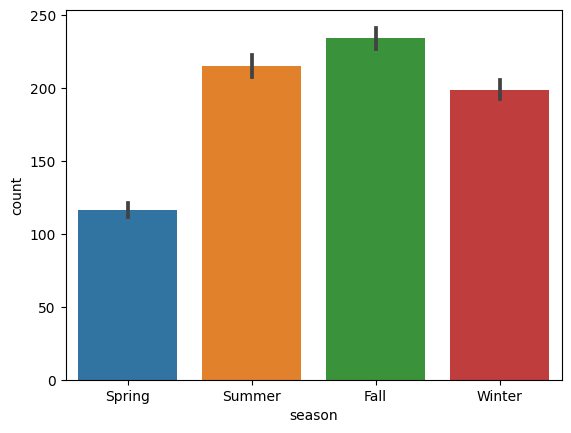

In [17]:
sns.barplot(x='season', y='count', data=df)
plt.show()

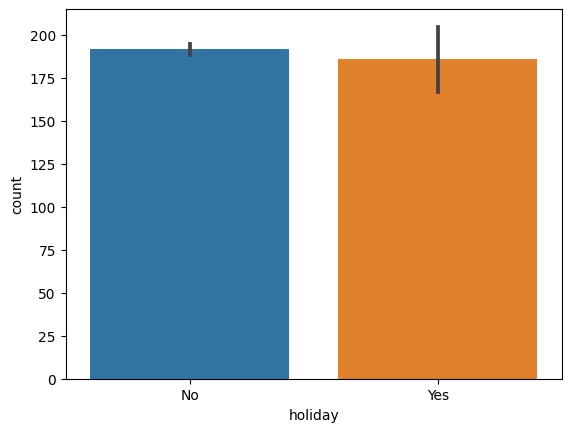

In [18]:
sns.barplot(x='holiday', y='count', data=df)
plt.show()

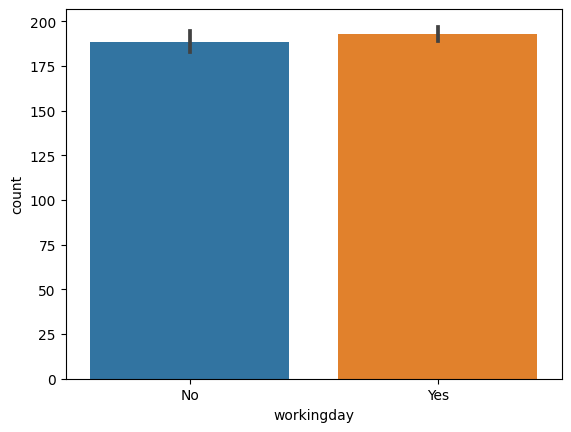

In [19]:
sns.barplot(x='workingday', y='count', data=df)
plt.show()

In [20]:
df.drop(['workingday'], axis=1, inplace=True)

In [21]:
df.columns

Index(['datetime', 'season', 'holiday', 'weather', 'temp', 'humidity',
       'windspeed', 'count'],
      dtype='object')

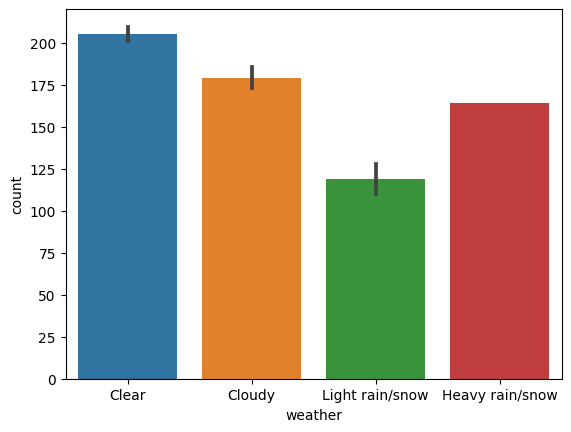

In [22]:
sns.barplot(x='weather', y='count', data=df)
plt.show()

In [23]:
np.unique(df['weather'], return_counts=True)

(array(['Clear', 'Cloudy', 'Heavy rain/snow', 'Light rain/snow'],
       dtype=object),
 array([7192, 2834,    1,  859], dtype=int64))

In [24]:
from collections import Counter
Counter(df['weather'])

Counter({'Clear': 7192,
         'Cloudy': 2834,
         'Light rain/snow': 859,
         'Heavy rain/snow': 1})

In [25]:
df['weather'].replace(to_replace='Heavy rain/snow', value='Light rain/snow', inplace=True)

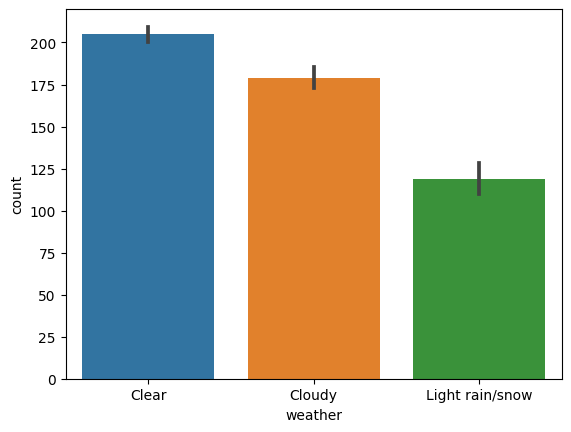

In [26]:
sns.barplot(x='weather', y='count', data=df)
plt.show()

In [27]:
sns.__version__

'0.12.2'

In [28]:
df.head()

,datetime,season,holiday,weather,temp,humidity,windspeed,count
0,2011-01-01 00:00:00,Spring,No,Clear,9.84,81,0.0,16
1,2011-01-01 01:00:00,Spring,No,Clear,9.02,80,0.0,40
2,2011-01-01 02:00:00,Spring,No,Clear,9.02,80,0.0,32
3,2011-01-01 03:00:00,Spring,No,Clear,9.84,75,0.0,13
4,2011-01-01 04:00:00,Spring,No,Clear,9.84,75,0.0,1


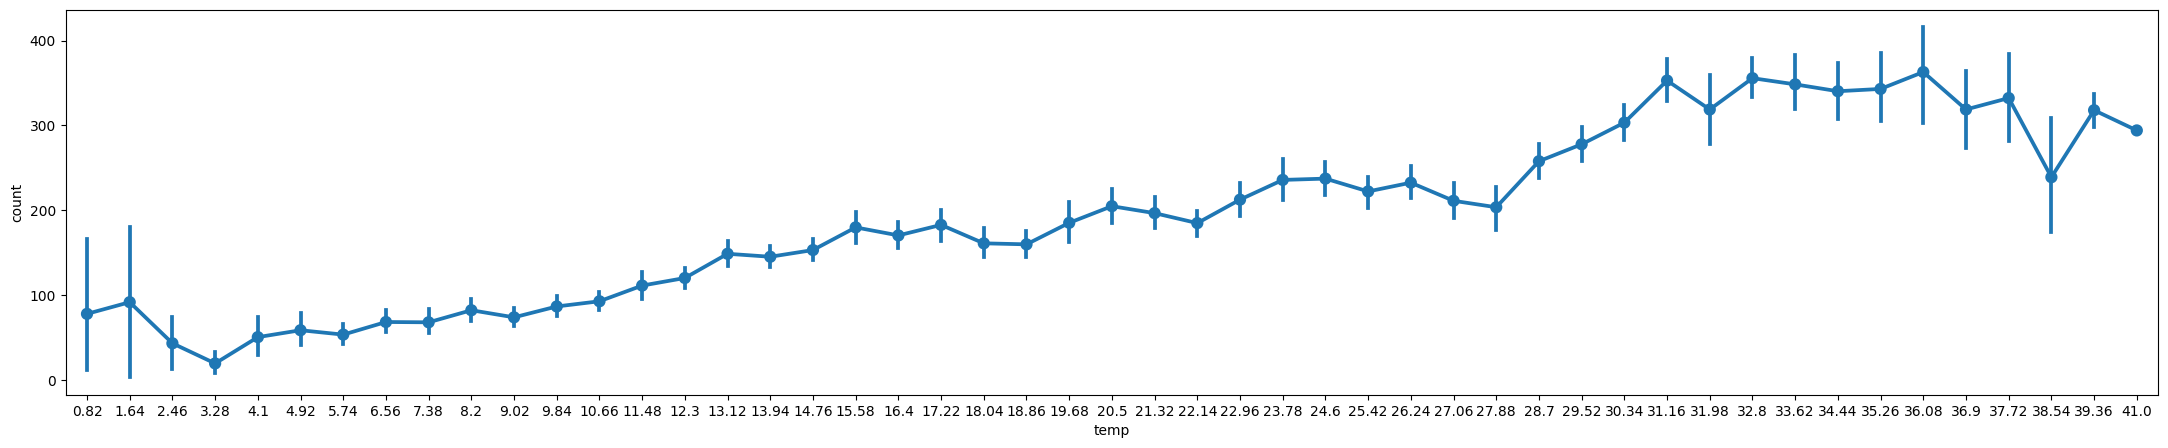

In [29]:
plt.figure(figsize=(27, 5))
sns.pointplot(x='temp', y='count', data=df)
plt.show()

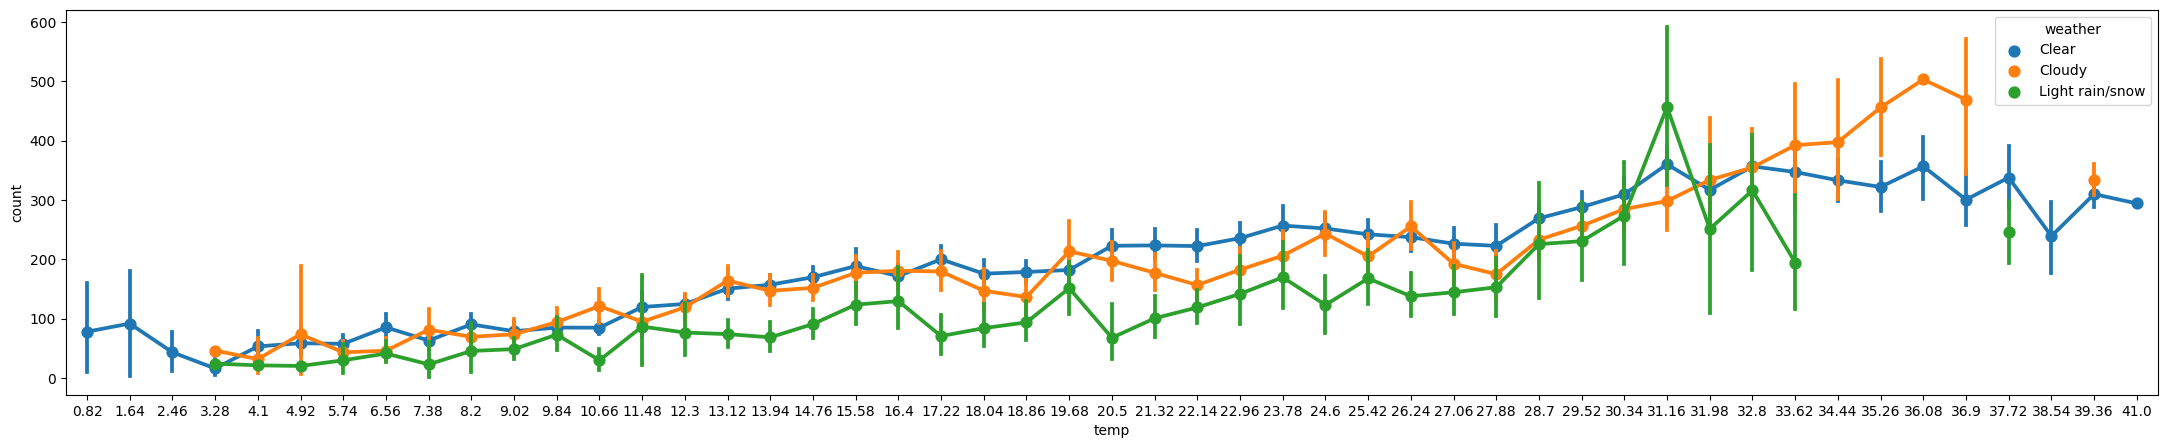

In [30]:
plt.figure(figsize=(27, 5))
sns.pointplot(x='temp', y='count', data=df, hue='weather')
plt.show()

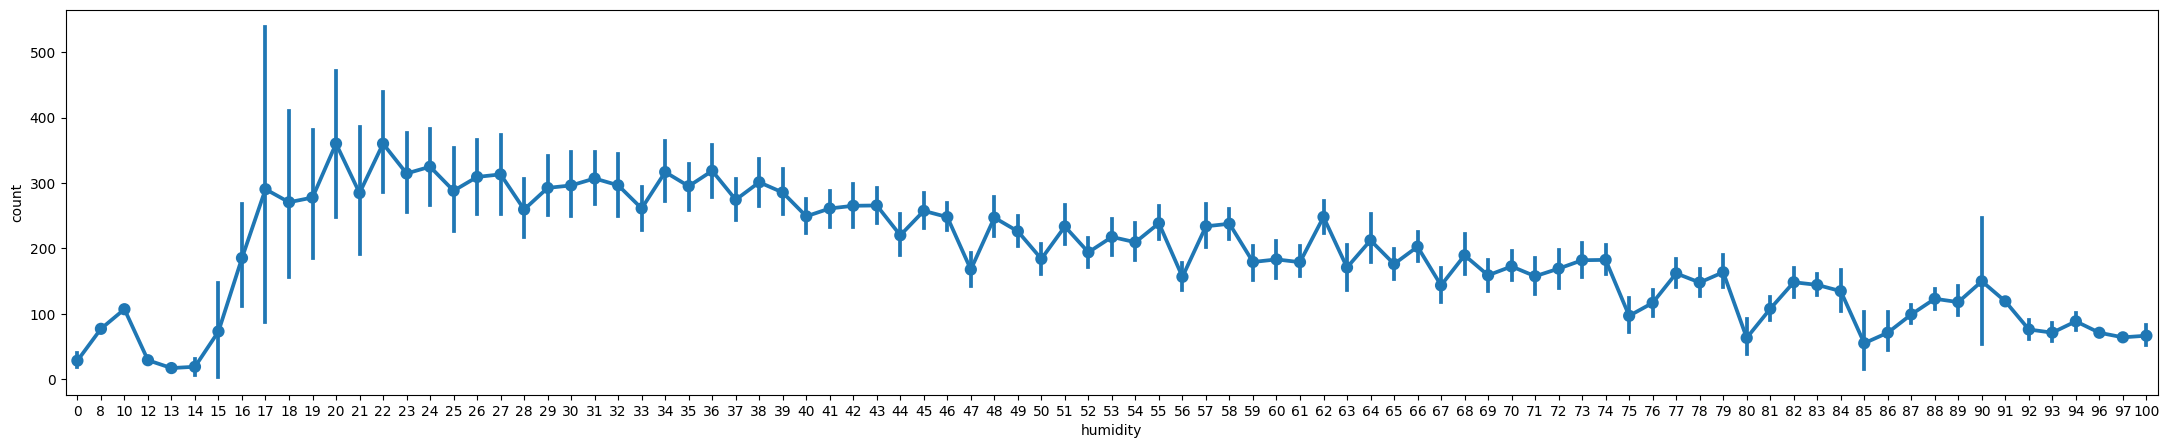

In [31]:
plt.figure(figsize=(27, 5))
sns.pointplot(x='humidity', y='count', data=df)
plt.show()

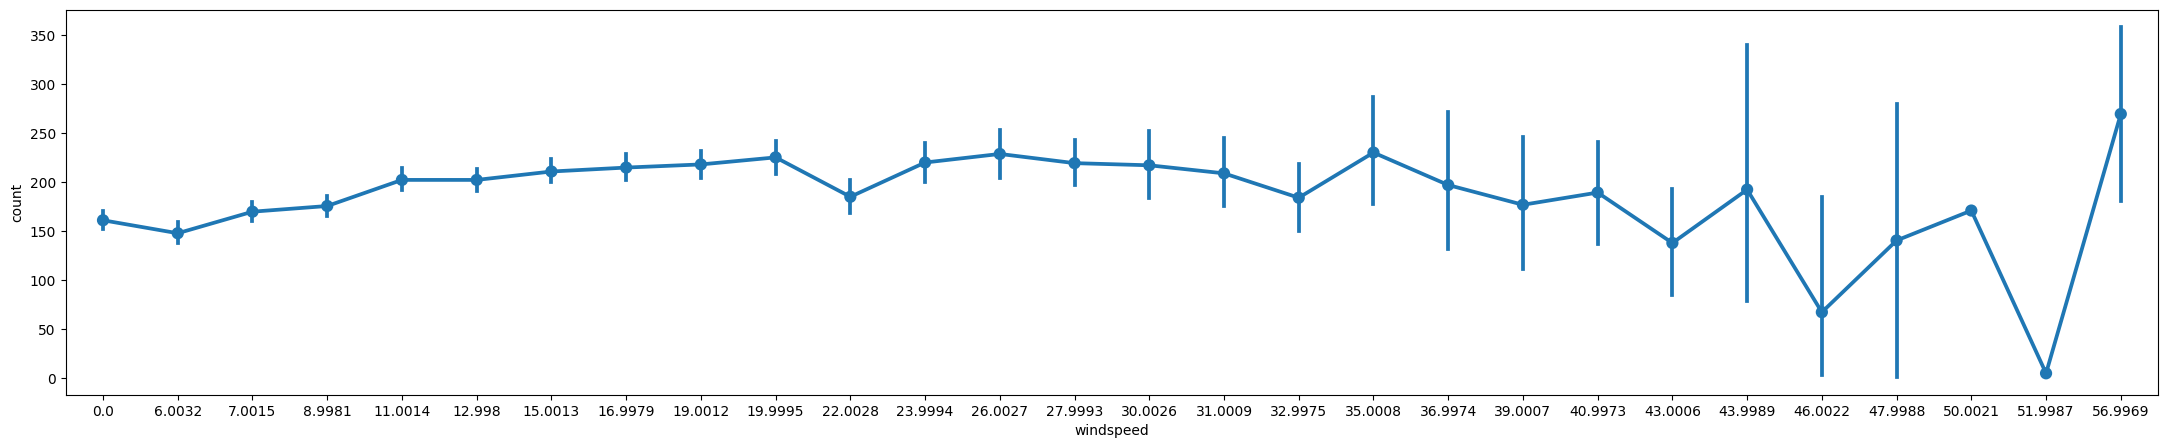

In [32]:
plt.figure(figsize=(27, 5))
sns.pointplot(x='windspeed', y='count', data=df)
plt.show()

In [33]:
df[df['windspeed']>=55]

,datetime,season,holiday,weather,temp,humidity,windspeed,count
2755,2011-07-03 17:00:00,Fall,No,Light rain/snow,32.8,49,56.9969,358
2756,2011-07-03 18:00:00,Fall,No,Light rain/snow,32.8,49,56.9969,181


In [34]:
df.head()

,datetime,season,holiday,weather,temp,humidity,windspeed,count
0,2011-01-01 00:00:00,Spring,No,Clear,9.84,81,0.0,16
1,2011-01-01 01:00:00,Spring,No,Clear,9.02,80,0.0,40
2,2011-01-01 02:00:00,Spring,No,Clear,9.02,80,0.0,32
3,2011-01-01 03:00:00,Spring,No,Clear,9.84,75,0.0,13
4,2011-01-01 04:00:00,Spring,No,Clear,9.84,75,0.0,1


In [35]:
df.dtypes

datetime      object
season        object
holiday       object
weather       object
temp         float64
humidity       int64
windspeed    float64
count          int64
dtype: object

In [36]:
df['datetime'] = pd.DatetimeIndex(df['datetime'])

In [37]:
hour = []

for timestamp in df['datetime']:
    hour = np.append(hour, timestamp.hour)

In [38]:
hour[:25]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.,  0.])

In [39]:
df['datetime'][:25]

0    2011-01-01 00:00:00
1    2011-01-01 01:00:00
2    2011-01-01 02:00:00
3    2011-01-01 03:00:00
4    2011-01-01 04:00:00
5    2011-01-01 05:00:00
6    2011-01-01 06:00:00
7    2011-01-01 07:00:00
8    2011-01-01 08:00:00
9    2011-01-01 09:00:00
10   2011-01-01 10:00:00
11   2011-01-01 11:00:00
12   2011-01-01 12:00:00
13   2011-01-01 13:00:00
14   2011-01-01 14:00:00
15   2011-01-01 15:00:00
16   2011-01-01 16:00:00
17   2011-01-01 17:00:00
18   2011-01-01 18:00:00
19   2011-01-01 19:00:00
20   2011-01-01 20:00:00
21   2011-01-01 21:00:00
22   2011-01-01 22:00:00
23   2011-01-01 23:00:00
24   2011-01-02 00:00:00
Name: datetime, dtype: datetime64[ns]

In [40]:
df['datetime'] = hour

In [41]:
df.head()

,datetime,season,holiday,weather,temp,humidity,windspeed,count
0,0.0,Spring,No,Clear,9.84,81,0.0,16
1,1.0,Spring,No,Clear,9.02,80,0.0,40
2,2.0,Spring,No,Clear,9.02,80,0.0,32
3,3.0,Spring,No,Clear,9.84,75,0.0,13
4,4.0,Spring,No,Clear,9.84,75,0.0,1


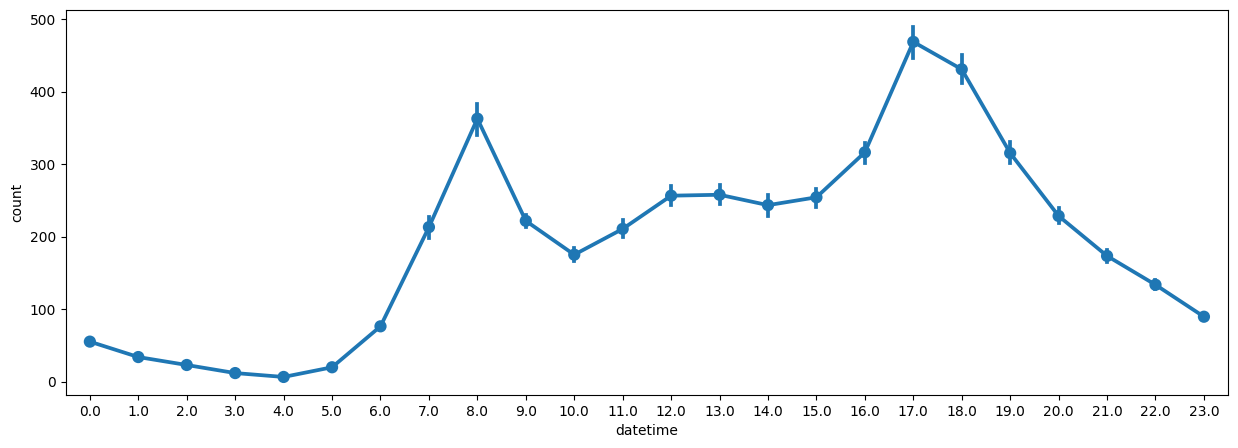

In [42]:
plt.figure(figsize=(15, 5))
sns.pointplot(x='datetime', y='count', data=df)
plt.show()

In [43]:
df.head()

,datetime,season,holiday,weather,temp,humidity,windspeed,count
0,0.0,Spring,No,Clear,9.84,81,0.0,16
1,1.0,Spring,No,Clear,9.02,80,0.0,40
2,2.0,Spring,No,Clear,9.02,80,0.0,32
3,3.0,Spring,No,Clear,9.84,75,0.0,13
4,4.0,Spring,No,Clear,9.84,75,0.0,1


In [44]:
df['season'].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [45]:
mapper = {'Spring': 0, 'Summer': 3, 'Fall': 2, 'Winter': 1}
df['season'] = df['season'].map(mapper)

In [46]:
df.sample(5)

,datetime,season,holiday,weather,temp,humidity,windspeed,count
5188,6.0,1,No,Clear,9.84,65,7.0015,11
1380,9.0,3,No,Clear,14.76,50,32.9975,142
9734,23.0,1,No,Cloudy,19.68,77,6.0032,84
9626,11.0,1,No,Clear,28.70,48,12.9980,304
5536,19.0,0,No,Clear,13.94,34,6.0032,265


In [47]:
df['holiday'].unique()

array(['No', 'Yes'], dtype=object)

In [48]:
mapper = {'No': 0, 'Yes': 1, }
df['holiday'] = df['holiday'].map(mapper)

In [49]:
df['weather'].unique()

array(['Clear', 'Cloudy', 'Light rain/snow'], dtype=object)

In [50]:
mapper = {'Clear': 0, 'Cloudy': 2, 'Light rain/snow': 1}
df['weather'] = df['weather'].map(mapper)

In [51]:
df.sample(5)

,datetime,season,holiday,weather,temp,humidity,windspeed,count
1478,11.0,3,0,2,18.86,55,0.0000,122
7620,21.0,3,0,0,26.24,73,12.9980,393
1913,15.0,3,0,0,24.60,38,26.0027,260
2412,10.0,3,0,0,33.62,43,15.0013,90
3253,11.0,2,0,2,31.16,52,16.9979,147


In [52]:
df['datetime'] /= 23

In [53]:
to_scale = ['temp', 'humidity', 'windspeed']

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [56]:
df[to_scale] = scaler.fit_transform(df[to_scale])

In [57]:
df.sample(10)

,datetime,season,holiday,weather,temp,humidity,windspeed,count
9202,0.826087,2,0,0,0.981763,0.629466,0.514260,558
2587,0.739130,3,0,0,1.297502,-1.760871,-0.710164,638
3735,0.608696,2,0,1,0.245037,1.356960,0.759638,24
644,0.043478,0,0,1,-1.859893,0.941249,-0.465608,7
4740,0.608696,1,0,1,-0.702182,1.304996,0.759638,64
9646,0.304348,1,0,0,0.245037,1.097141,0.881916,84
210,0.043478,0,0,0,-1.965140,-0.617666,0.759638,1
8093,0.608696,3,0,0,0.771270,-0.461775,-1.567754,582
144,0.304348,0,0,0,-1.544154,0.369647,-0.465608,84
5067,0.217391,1,0,0,-1.017921,1.304996,-0.710164,25


# DS 13

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import VotingRegressor

In [59]:
dtree = DecisionTreeRegressor(random_state=666)
knn = KNeighborsRegressor()
logistic = LinearRegression()

In [60]:
algorithms = [('DTree', dtree), 
              ('KNN', knn), 
              ('Logistic', logistic)
             ]

ensemble_reg = VotingRegressor(estimators=algorithms, n_jobs=-1,)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X = df.drop(['count'], axis=1)
y = df['count']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666, shuffle=True)

In [64]:
ensemble_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('DTree', DecisionTreeRegressor(random_state=666)),
                            ('KNN', KNeighborsRegressor()),
                            ('Logistic', LinearRegression())],
                n_jobs=-1)

In [65]:
y_pred = ensemble_reg.predict(X_test)

In [66]:
from sklearn.metrics import mean_absolute_error, r2_score

In [67]:
mean_absolute_error(y_test, y_pred)

83.92879651881974

In [68]:
r2_score(y_test, y_pred)

0.5725952988099319